In [ ]:
#import library
import numpy as np
import pandas as pd

print('numpy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))

numpy: 1.22.4
pandas: 1.5.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
stroke_df = pd.read_csv("/content/drive/MyDrive/dataset/healthcare-dataset-stroke-data.csv")

In [ ]:
#membaca data dari dataframe
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#info data
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Preprocessing

In [ ]:
#menghapus fitur id
stroke_df = stroke_df.drop('id', axis=1)

In [ ]:
#mengubah nilai pada kolom menjadi angka 
stroke_df['gender'] = stroke_df['gender'].map({'Male': 1, 'Female': 0,'Other':2})

In [ ]:
stroke_df['ever_married'] = stroke_df['ever_married'].map({'Yes': 1, 'No': 0})

In [ ]:
stroke_df['work_type'] = stroke_df['work_type'].map({'Private': 0, 'Self-employed': 1,'children':2,'Govt_job':3,'Never_worked':4})

In [ ]:
stroke_df['Residence_type'] = stroke_df['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [ ]:
stroke_df['smoking_status'] = stroke_df['smoking_status'].map({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3})

In [ ]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,61.0,0,0,1,1,0,202.21,NaN,0,1
2,1,80.0,0,1,1,0,0,105.92,32.5,0,1
3,0,49.0,0,0,1,0,1,171.23,34.4,3,1
4,0,79.0,1,0,1,1,0,174.12,24.0,0,1


In [ ]:
stroke_df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,0.832094,0.508023,106.147677,28.893237,1.111742,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.109924,0.499985,45.283560,7.854067,1.071819,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.885000,28.100000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
#cek apakah ada missing value
stroke_df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
#mencari banyak data yang hilang
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#fungsi untuk mengatasi missing value
def imputasi(df_input):
  list_columns = df_input.columns
  class_column = list_columns[-1]
  for col in list_columns[:-1]:
    df_input[col] = df_input[col].fillna(df_input.groupby(class_column)[col].transform('mean'))
  return df_input

In [ ]:
stroke_imputasi = imputasi(stroke_df)

In [ ]:
#memeriksa apakah masih ada missing value
stroke_imputasi.isnull().values.any()

False

In [ ]:
stroke_imputasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [ ]:
def minmax(df_input):
  df_minmax = df_input.copy()
  list_fitur = df_minmax.columns[:-1]
  for fitur in list_fitur:
    max = df_minmax[fitur].max()
    min = df_minmax[fitur].min()
    df_minmax[fitur] = (df_minmax[fitur]-min)/(max-min)
  return df_minmax

In [ ]:
stroke_normal = minmax(stroke_imputasi)

In [ ]:
stroke_normal.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.816895,0.0,1.0,1.0,0.00,1.0,0.801265,0.301260,0.666667,1
1,0.0,0.743652,0.0,0.0,1.0,0.25,0.0,0.679023,0.231057,0.000000,1
2,0.5,0.975586,0.0,1.0,1.0,0.00,0.0,0.234512,0.254296,0.000000,1
3,0.0,0.597168,0.0,0.0,1.0,0.00,1.0,0.536008,0.276060,1.000000,1
4,0.0,0.963379,1.0,0.0,1.0,0.25,0.0,0.549349,0.156930,0.000000,1


In [ ]:
#membagi data latih dan data uji tanpa dilakukan undersampling
from sklearn.model_selection import train_test_split
data_latih0, data_uji0 = train_test_split(stroke_normal, test_size=0.2, random_state=101)
data_latih0.reset_index(drop=True)
data_uji0.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,0.243164,0.0,0.0,0.0,0.00,0.0,0.288385,0.077892,0.000000,0
1,0.0,0.536133,0.0,0.0,1.0,0.00,0.0,0.255240,0.231386,1.000000,0
2,0.0,0.865723,1.0,0.0,1.0,0.00,1.0,0.643985,0.243986,0.000000,0
3,0.5,0.414062,0.0,0.0,1.0,0.00,1.0,0.244668,0.136312,0.333333,0
4,0.5,1.000000,0.0,0.0,1.0,0.00,1.0,0.160235,0.164948,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
1017,0.5,0.755859,0.0,0.0,1.0,0.25,0.0,0.374204,0.250859,0.333333,0
1018,0.0,0.548340,0.0,0.0,1.0,0.75,0.0,0.137891,0.287514,0.333333,0
1019,0.0,0.707031,0.0,1.0,1.0,0.00,0.0,0.411042,0.179840,1.000000,0
1020,0.0,0.938965,0.0,0.0,1.0,0.00,0.0,0.092051,0.134021,0.333333,0


In [ ]:
print("banyak data uji =", data_uji0.shape[0])
print("banyak data latih =", data_latih0.shape[0])

banyak data uji = 1022
banyak data latih = 4088


In [ ]:
label_latih0 = data_latih0.pop('stroke')
label_uji0 = data_uji0.pop('stroke')

In [ ]:
#membagi data latih dan data uji dengan dilakukan undersampling
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Pisahkan data fitur dan target
X = stroke_normal.drop('stroke', axis=1)
y = stroke_normal['stroke']

# Bagi data menjadi data latih dan data uji
data_latih, data_uji, label_latih, label_uji = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#proses undersampling
from imblearn.under_sampling import RandomUnderSampler

# Tentukan jumlah data yang diinginkan untuk kelas mayoritas
target_data_count = 1200

# Inisialisasi undersampler
undersampler = RandomUnderSampler(sampling_strategy={0: target_data_count})

# Melakukan undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)


In [ ]:
print("banyak data uji =", data_uji.shape[0])
print("banyak data latih =", X_resampled.shape[0])

banyak data uji = 1022
banyak data latih = 1449


## KNN

In [ ]:
#rumus manhattan
def jarakCity(data1,data2):
  jarak = abs(data1-data2)
  jarak = np.sum(jarak)
  return jarak

In [ ]:
#knn manhattan
from collections import Counter
def knnCity(k, datalatih, labellatih, datauji):
  jarak = np.array([jarakCity(datalatih.iloc[x],datauji) for x in range(datalatih.shape[0])])
  indeks_k_minimum = jarak.argsort()[:k]
  k_kelas = labellatih.iloc[indeks_k_minimum].to_numpy()
  counter = Counter(k_kelas)
  kelas_uji = counter.most_common(1)[0][0]
  return kelas_uji

def knn_multi(k, datalatih, labellatih, datauji):
  kelas_uji = np.array([knnCity(k, datalatih, labellatih, datauji.iloc[x]) for x in range(datauji.shape[0])])
  return kelas_uji

In [ ]:
#knn manhattan k=7 tanpa undersampling
hasil_klasifikasi0 = knn_multi(7,data_latih0,label_latih0,data_uji0)
print("hasil kelas seluruh data uji = ", hasil_klasifikasi0)

hasil kelas seluruh data uji =  [0 0 0 ... 0 0 1]


In [ ]:
#knn manhattan k=7 dengan undersampling
hasil_klasifikasi = knn_multi(7, X_resampled,y_resampled,data_uji)
print("hasil kelas seluruh data uji = ", hasil_klasifikasi)

hasil kelas seluruh data uji =  [0 0 0 ... 0 0 0]


In [ ]:
#cek akurasi biasa
def cek_hasil(labeluji,hasilklasifikasi):
  n = 0;
  for i in range(labeluji.shape[0]):
    if labeluji.iloc[i] == hasilklasifikasi[i]:
      n = n+1
  return n

In [ ]:
#akurasi manhattan k=7 tanpa undersampling
nilai_benar0 = cek_hasil(label_uji0,hasil_klasifikasi0)
print("banyaknya hasil yang sama = ", nilai_benar0)
print("jadi persentase nilai hasil klasifikasi dan label sebenarnya sama adalah ",(nilai_benar0*100/hasil_klasifikasi0.size),"%")

banyaknya hasil yang sama =  963
jadi persentase nilai hasil klasifikasi dan label sebenarnya sama adalah  94.22700587084148 %


In [ ]:
#akurasi manhattan k=7 dengan undersampling
nilai_benar = cek_hasil(label_uji,hasil_klasifikasi)
print("banyaknya hasil yang sama = ", nilai_benar)
print("jadi persentase nilai hasil klasifikasi dan label sebenarnya sama adalah ",(nilai_benar*100/hasil_klasifikasi.size),"%")

banyaknya hasil yang sama =  949
jadi persentase nilai hasil klasifikasi dan label sebenarnya sama adalah  92.85714285714286 %


## Evaluasi

In [ ]:
#hasil tanpa undersampling
from sklearn.metrics import classification_report
print(classification_report(label_uji0, hasil_klasifikasi0))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.33      0.09      0.14        54

    accuracy                           0.94      1022
   macro avg       0.64      0.54      0.56      1022
weighted avg       0.92      0.94      0.93      1022



In [ ]:
#hasil dengan undersampling
from sklearn.metrics import classification_report
print(classification_report(label_uji, hasil_klasifikasi))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       968
           1       0.32      0.31      0.32        54

    accuracy                           0.93      1022
   macro avg       0.64      0.64      0.64      1022
weighted avg       0.93      0.93      0.93      1022



#### Data Story dari Dataset Stroke

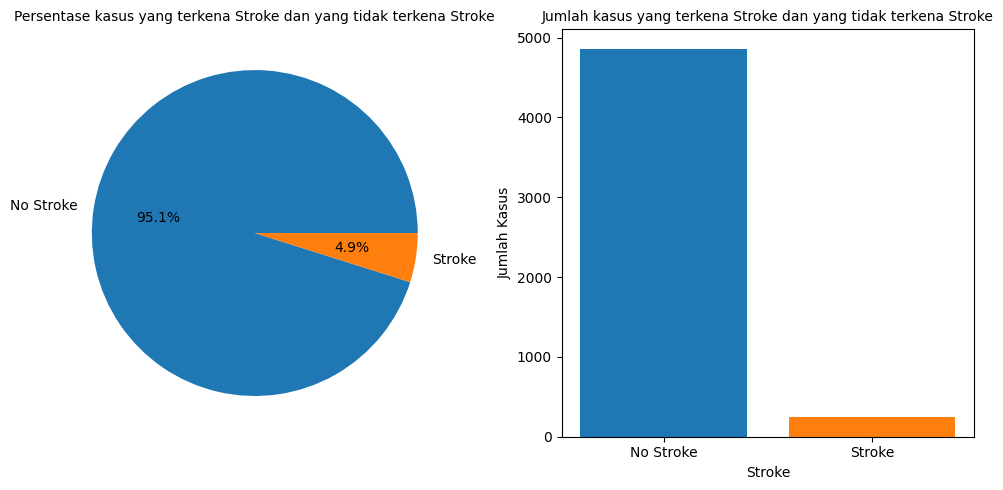

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data_story = stroke_df['stroke'].value_counts()
labels = ['No Stroke', 'Stroke']
colors = ['#1f77b4', '#ff7f0e']

# Plot diagram pie pada axes pertama
axs[0].pie(data_story, labels=labels, colors=colors, autopct='%1.1f%%')
axs[0].set_title('Persentase kasus yang terkena Stroke dan yang tidak terkena Stroke', fontsize=10)

# Plot diagram bar pada axes kedua
axs[1].bar(labels, data_story, color=colors)
axs[1].set_title('Jumlah kasus yang terkena Stroke dan yang tidak terkena Stroke', fontsize=10)
axs[1].set_xlabel('Stroke')
axs[1].set_ylabel('Jumlah Kasus')

# Menampilkan plot
plt.tight_layout()
plt.show()


##### Data Story dari Dataset Prediksi Stroke Menggunakan KNN

In [ ]:
# Menggabungkan data uji dengan hasil klasifikasi
prediksi_df = data_uji.copy() 
prediksi_df['predicted_stroke'] = hasil_klasifikasi  # Menambahkan kolom predicted_stroke dengan hasil klasifikasi

# Menampilkan dataset baru
prediksi_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,predicted_stroke
5031,0.0,0.243164,0.0,0.0,0.0,0.0,0.0,0.288385,0.077892,0.000000,0
4017,0.0,0.536133,0.0,0.0,1.0,0.0,0.0,0.255240,0.231386,1.000000,0
744,0.0,0.865723,1.0,0.0,1.0,0.0,1.0,0.643985,0.243986,0.000000,0
1799,0.5,0.414062,0.0,0.0,1.0,0.0,1.0,0.244668,0.136312,0.333333,0
2314,0.5,1.000000,0.0,0.0,1.0,0.0,1.0,0.160235,0.164948,1.000000,0


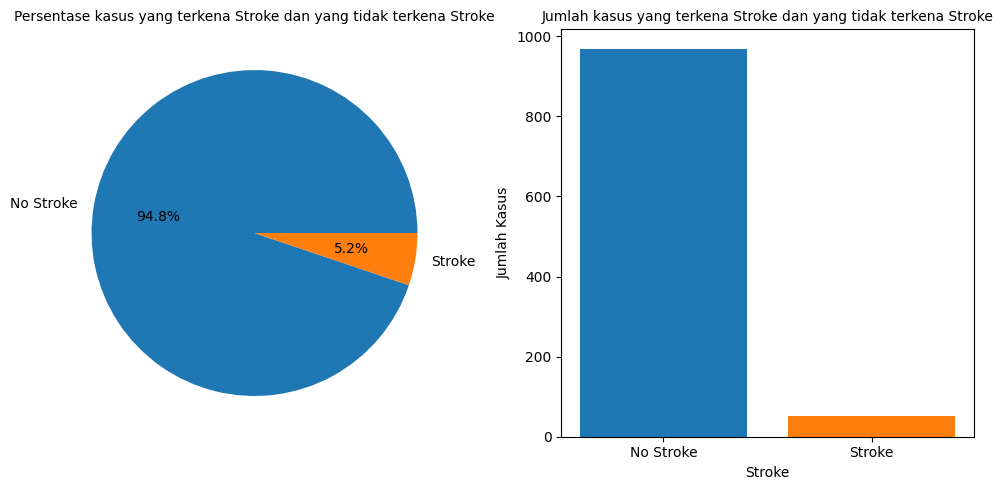

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data_story2 = prediksi_df['predicted_stroke'].value_counts()
labels = ['No Stroke', 'Stroke']
colors = ['#1f77b4', '#ff7f0e']

# Plot diagram pie pada axes pertama
axs[0].pie(data_story2, labels=labels, colors=colors, autopct='%1.1f%%')
axs[0].set_title('Persentase kasus yang terkena Stroke dan yang tidak terkena Stroke', fontsize=10)

# Plot diagram bar pada axes kedua
axs[1].bar(labels, data_story2, color=colors)
axs[1].set_title('Jumlah kasus yang terkena Stroke dan yang tidak terkena Stroke', fontsize=10)
axs[1].set_xlabel('Stroke')
axs[1].set_ylabel('Jumlah Kasus')

# Menampilkan plot
plt.tight_layout()
plt.show()

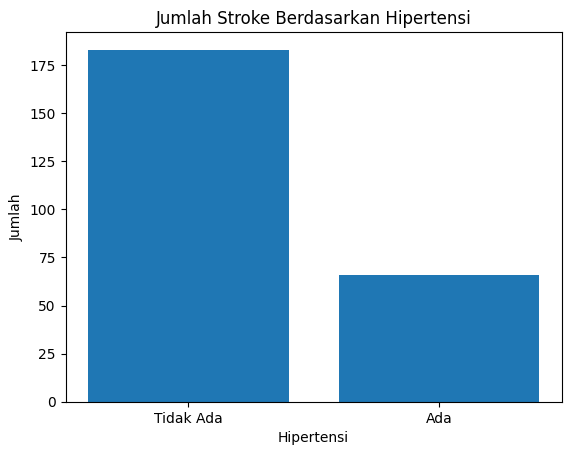

In [ ]:
# Menghitung jumlah individu dengan dan tanpa hipertensi yang mengalami stroke
hypertension_stroke_counts = stroke_df[stroke_df['stroke'] == 1]['hypertension'].value_counts()

# Membuat bar chart
plt.bar(hypertension_stroke_counts.index, hypertension_stroke_counts.values)
plt.xlabel('Hipertensi')
plt.ylabel('Jumlah')
plt.title('Jumlah Stroke Berdasarkan Hipertensi')
plt.xticks([0, 1], ['Tidak Ada', 'Ada'])
plt.show()

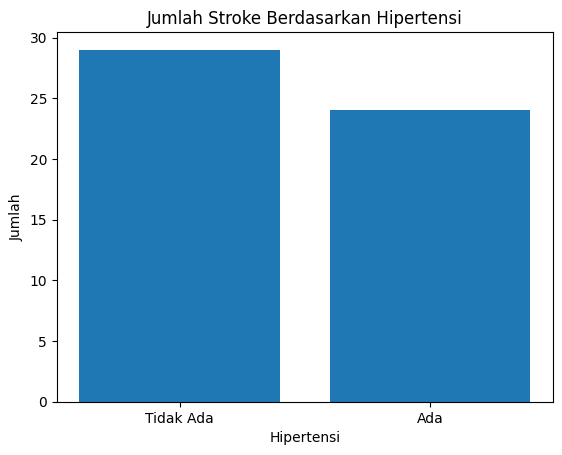

In [ ]:
# Menghitung jumlah individu dengan dan tanpa hipertensi yang mengalami stroke
hypertension_stroke_counts = prediksi_df[prediksi_df['predicted_stroke'] == 1]['hypertension'].value_counts()

# Membuat bar chart
plt.bar(hypertension_stroke_counts.index, hypertension_stroke_counts.values)
plt.xlabel('Hipertensi')
plt.ylabel('Jumlah')
plt.title('Jumlah Stroke Berdasarkan Hipertensi')
plt.xticks([0, 1], ['Tidak Ada', 'Ada'])
plt.show()

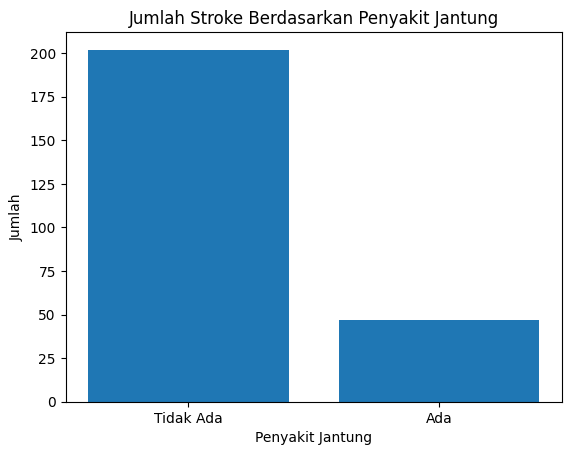

In [ ]:
# Menghitung jumlah individu dengan dan tanpa hipertensi yang mengalami stroke
hypertension_stroke_counts = stroke_df[stroke_df['stroke'] == 1]['heart_disease'].value_counts()

# Membuat bar chart
plt.bar(hypertension_stroke_counts.index, hypertension_stroke_counts.values)
plt.xlabel('Penyakit Jantung')
plt.ylabel('Jumlah')
plt.title('Jumlah Stroke Berdasarkan Penyakit Jantung')
plt.xticks([0, 1], ['Tidak Ada', 'Ada'])
plt.show()

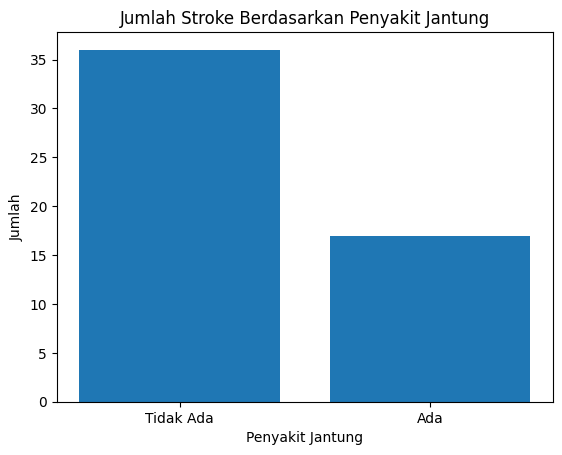

In [ ]:
# Menghitung jumlah individu dengan dan tanpa hipertensi yang mengalami stroke
hypertension_stroke_counts = prediksi_df[prediksi_df['predicted_stroke'] == 1]['heart_disease'].value_counts()

# Membuat bar chart
plt.bar(hypertension_stroke_counts.index, hypertension_stroke_counts.values)
plt.xlabel('Penyakit Jantung')
plt.ylabel('Jumlah')
plt.title('Jumlah Stroke Berdasarkan Penyakit Jantung')
plt.xticks([0, 1], ['Tidak Ada', 'Ada'])
plt.show()